In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
import string
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
word_count_df = pd.read_csv('./unigram_freq.csv', index_col=0, dtype={'count': np.int32})

In [3]:
word_count_df['frequency'] = word_count_df['count'] / word_count_df['count'].sum()

In [4]:
def tokenize(source):
    """Tokenises the provided source.
    Result will include only words, but not punctuation or digits
    Args:
        source (str): a string to tokenise
    Returns:
        list of str: a sequence of extracted tokens
    """

    all_tokens = word_tokenize(source)
    filtered_tokens = [t for t in all_tokens if t.isalpha()]
    return list(filtered_tokens)

In [5]:
def evaluate_text(text, scorer):
    """Evaluates text's modernity score according to specified scorer.
    Args:
        text (str): a text to evaluate
        scorer (callable): scorer function to be applied. Must accept an iterable of tokens extracted from the text
    Returns:
        modernity score for the text according to the scorer
    """
    tokens = tokenize(text)
    score = scorer(tokens)
    return score

In [6]:
from functools import reduce

def average_scorer(tokens, param):
    """Modernity scorer that calculates an average param value of the tokens
    Args:
        tokens (iterable): tokens to be evaluated
        param (str): param to be averaged
    """
    def reducer(current_count, token):
        return current_count + \
            word_count_df[param].get(token, 0)
    
    num_tokens = len(list(tokens))
    count_sum = reduce(reducer, tokens, 0)
    score = count_sum / num_tokens
    return score

In [7]:
def rares_fraction(tokens):
    """Modernity scorer that calculates fraction of words that are not
    listed among the most frequent
    Args:
        tokens (iterable): tokens to be evaluated
    """
    num_tokens = len(list(tokens))
    rares = set(tokens) - set(word_count_df.index)
    score = len(rares) / num_tokens
    return score

In [8]:
books_index = [
    {
        'title': 'ADVENTURES OF SHERLOCK HOLMES',
        'author': 'A. CONAN DOYLE',
        'year': 1892,
        'file_name': 'Adventures Of Sherlock Holmes'
    },    
    {
        'title': 'The Picture of Dorian Gray',
        'author': 'Oscar Wilde',
        'year': 1890,
        'file_name': 'Dorian Gray'
    },    
    {
        'title': 'Frankenstein, or, the Modern Prometheus',
        'author': 'Mary Wollstonecraft (Godwin) Shelley',
        'year': 1823,
        'file_name': 'Frankenstein'
    },    
    {
        'title': 'GULLIVER’S TRAVELS INTO SEVERAL REMOTE NATIONS OF THE WORLD',
        'author': 'JONATHAN SWIFT',
        'year': 1726,
        'file_name': 'Gullivers travels'
    },    
    {
        'title': 'THE JUNGLE BOOK',
        'author': 'Rudyard Kipling',
        'year': 1894,
        'file_name': 'Jungle Book'
    },    
    {
        'title': ' The Life and Adventures of Robinson Crusoe',
        'author': 'Daniel Defoe',
        'year': 1719,
        'file_name': 'Robinson Crusoe'
    },    
    {
        'title': 'THE TRAGEDY OF ROMEO AND JULIET',
        'author': 'William Shakespeare',
        'year': 1597,
        'file_name': 'Romeo and Juliet'
    },    
    {
        'title': 'The Time Machine',
        'author': 'H. G. Wells',
        'year': 1895,
        'file_name': 'The Time Machine'
    },    
    {
        'title': 'TREASURE ISLAND',
        'author': 'Robert Louis Stevenson',
        'year': 1882,
        'file_name': 'Treasure Island'
    },    
    {
        'title': 'Vanity Fair',
        'author': 'William Makepeace Thackeray',
        'year': 1848,
        'file_name': 'Vanity Fair'
    },
    {
        'title': 'JANE EYRE',
        'author': 'CHARLOTTE BRONTE',
        'year': 1847,
        'file_name': 'Jane Eyre'
    },
    {
        'title': 'PRIDE AND PREJUDICE',
        'author': 'Jane Austen',
        'year': 1813,
        'file_name': 'Pride and Prejudice'
    },
    {
        'title': 'The Great Gatsby',
        'author': 'F. Scott Fitzgerald',
        'year': 1925,
        'file_name': 'The Great Gatsby'
    },
    {
        'title': 'ALICE’S ADVENTURES IN WONDERLAND',
        'author': 'Lewis Carroll',
        'year': 1872,
        'file_name': 'Alices adventures in Wonderland'
    },
]

In [9]:
results = []
for book in books_index:
    with open(f"./books/{book['file_name']}.txt", 'rt', encoding='utf8') as f:
        text = f.read()
        score = evaluate_text(text, lambda tokens: average_scorer(tokens, 'frequency'))
        results.append({
            'book': book,
            'score': score
        })

In [10]:
years = [r['book']['year'] for r in results]
scores = [r['score'] * 10000 for r in results]
labels = [r['book']['title'] for r in results]

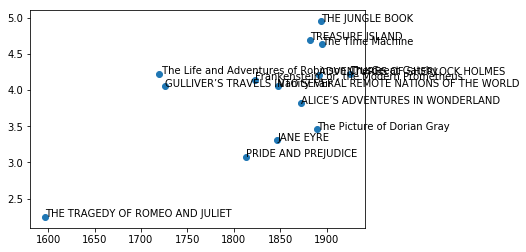

In [11]:
fig, ax = plt.subplots()
ax.scatter(years, scores)

for i, txt in enumerate(labels):
    ax.annotate(txt, (years[i], scores[i]))

In [12]:
results = []
for book in books_index:
    with open(f"./books/{book['file_name']}.txt", 'rt', encoding='utf8') as f:
        text = f.read()
        score = evaluate_text(text, rares_fraction)
        results.append({
            'book': book,
            'score': score
        })

In [13]:
results

[{'book': {'author': 'A. CONAN DOYLE',
   'file_name': 'Adventures Of Sherlock Holmes',
   'title': 'ADVENTURES OF SHERLOCK HOLMES',
   'year': 1892},
  'score': 0.013138348156579785},
 {'book': {'author': 'Oscar Wilde',
   'file_name': 'Dorian Gray',
   'title': 'The Picture of Dorian Gray',
   'year': 1890},
  'score': 0.014209840921277736},
 {'book': {'author': 'Mary Wollstonecraft (Godwin) Shelley',
   'file_name': 'Frankenstein',
   'title': 'Frankenstein, or, the Modern Prometheus',
   'year': 1823},
  'score': 0.009838746431108669},
 {'book': {'author': 'JONATHAN SWIFT',
   'file_name': 'Gullivers travels',
   'title': 'GULLIVER’S TRAVELS INTO SEVERAL REMOTE NATIONS OF THE WORLD',
   'year': 1726},
  'score': 0.007461099835701169},
 {'book': {'author': 'Rudyard Kipling',
   'file_name': 'Jungle Book',
   'title': 'THE JUNGLE BOOK',
   'year': 1894},
  'score': 0.017698063903076374},
 {'book': {'author': 'Daniel Defoe',
   'file_name': 'Robinson Crusoe',
   'title': ' The Life an

In [14]:
years = [r['book']['year'] for r in results]
scores = [r['score'] * 10000 for r in results]
labels = [r['book']['title'] for r in results]

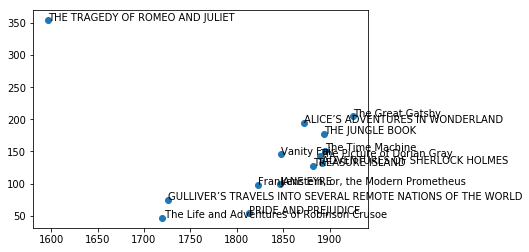

In [15]:
fig, ax = plt.subplots()
ax.scatter(years, scores)

for i, txt in enumerate(labels):
    ax.annotate(txt, (years[i], scores[i]))